In [31]:
import pandas as pd
#Import models
from sklearn import preprocessing
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import numpy as np
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp
import seaborn as sns
import matplotlib.pyplot as plt
#metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.multiclass import unique_labels
import itertools
#Model persistence
import pickle
from sklearn.externals import joblib

In [2]:
#load the datase
data=pd.read_csv("../Datasets/Colcom2018Cleaned.csv",header=0,sep=';')
print(data.head())
print(data.shape)

        name  tcp_packets  dist_port_tcp  external_ips  vulume_bytes  \
0  AntiVirus           36              6             3          3911   
1  AntiVirus          117              0             9         23514   
2  AntiVirus          196              0             6         24151   
3  AntiVirus            6              0             1           889   
4  AntiVirus            6              0             1           882   

   udp_packets  source_app_packets  remote_app_packets  source_app_bytes  \
0            0                  39                  33              5100   
1            0                 128                 107             26248   
2            0                 205                 214            163887   
3            0                   7                   6               819   
4            0                   7                   6               819   

   remote_app_bytes  dns_query_times    type  
0              4140                3  benign  
1             24

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


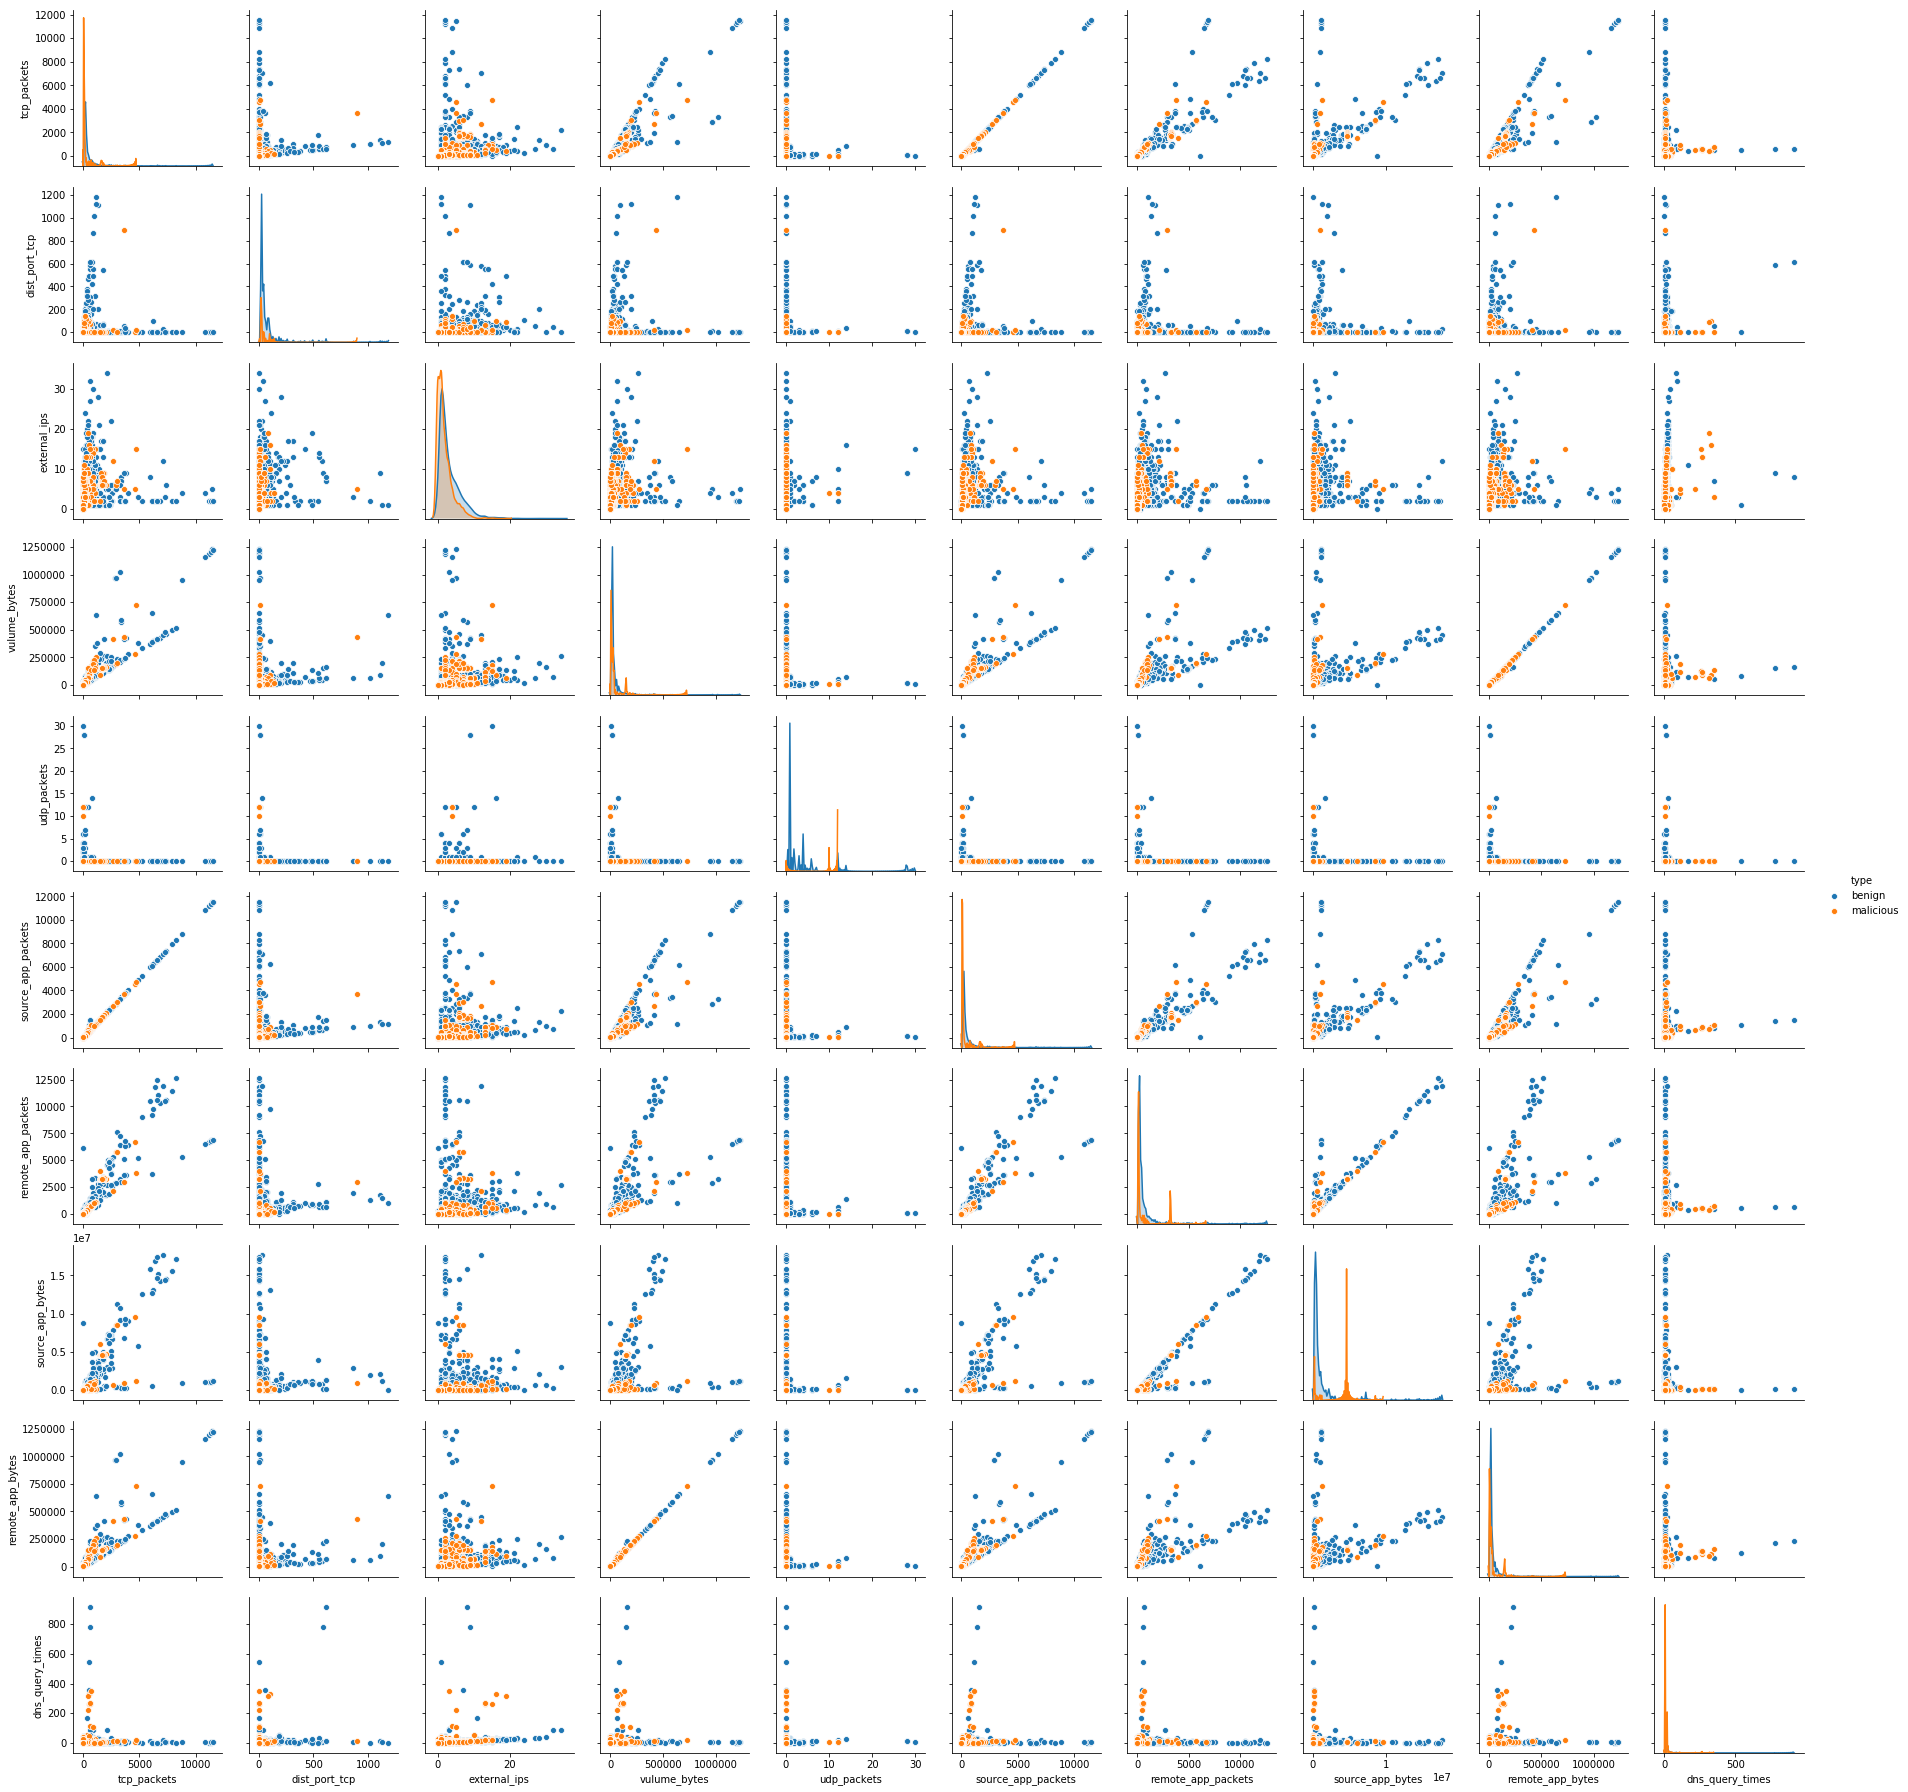

In [3]:
sns.pairplot(data,hue="type")

In [4]:
scaler = preprocessing.RobustScaler()
scaledData = scaler.fit_transform(data.iloc[:,1:11])
scaledData = pd.DataFrame(scaledData, columns=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets',' source_app_bytes','remote_app_bytes','dns_query_times'])

In [5]:
scaledData.shape


(7832, 10)

In [6]:
scaledData

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
0,0.127907,6.0,0.333333,0.036782,0.0,0.100000,0.105882,0.041652,0.029865,0.00
1,1.069767,0.0,2.333333,1.786894,0.0,1.088889,0.976471,0.897275,1.787684,2.00
2,1.988372,0.0,1.333333,1.843764,0.0,1.944444,2.235294,6.465984,1.831939,1.50
3,-0.220930,0.0,-0.333333,-0.233015,0.0,-0.255556,-0.211765,-0.131552,-0.245310,-0.50
4,-0.220930,0.0,-0.333333,-0.233640,0.0,-0.255556,-0.211765,-0.131552,-0.245919,-0.50
5,0.337209,54.0,0.333333,0.139541,0.0,0.366667,0.352941,0.056096,0.167148,1.50
6,-0.220930,0.0,-0.333333,-0.233015,0.0,-0.255556,-0.211765,-0.131552,-0.245310,-0.50
7,-0.220930,0.0,-0.333333,-0.209356,0.0,-0.255556,-0.211765,-0.140695,-0.223314,-0.50
8,-0.220930,0.0,-0.333333,-0.233104,0.0,-0.255556,-0.211765,-0.131552,-0.245397,-0.50
9,1.988372,0.0,0.333333,1.125882,0.0,1.888889,2.823529,11.992050,1.096659,0.25


In [7]:
scaledData=scaledData.join(data.type)

In [8]:
scaledData.loc[4693,:]

tcp_packets           -0.174419
dist_port_tcp                 0
external_ips          -0.333333
vulume_bytes          -0.229087
udp_packets                   0
source_app_packets         -0.2
remote_app_packets    -0.164706
 source_app_bytes    -0.0920235
remote_app_bytes      -0.235921
dns_query_times           -0.25
type                  malicious
Name: 4693, dtype: object

In [9]:
scaledData

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type
0,0.127907,6.0,0.333333,0.036782,0.0,0.100000,0.105882,0.041652,0.029865,0.00,benign
1,1.069767,0.0,2.333333,1.786894,0.0,1.088889,0.976471,0.897275,1.787684,2.00,benign
2,1.988372,0.0,1.333333,1.843764,0.0,1.944444,2.235294,6.465984,1.831939,1.50,benign
3,-0.220930,0.0,-0.333333,-0.233015,0.0,-0.255556,-0.211765,-0.131552,-0.245310,-0.50,benign
4,-0.220930,0.0,-0.333333,-0.233640,0.0,-0.255556,-0.211765,-0.131552,-0.245919,-0.50,benign
5,0.337209,54.0,0.333333,0.139541,0.0,0.366667,0.352941,0.056096,0.167148,1.50,benign
6,-0.220930,0.0,-0.333333,-0.233015,0.0,-0.255556,-0.211765,-0.131552,-0.245310,-0.50,benign
7,-0.220930,0.0,-0.333333,-0.209356,0.0,-0.255556,-0.211765,-0.140695,-0.223314,-0.50,benign
8,-0.220930,0.0,-0.333333,-0.233104,0.0,-0.255556,-0.211765,-0.131552,-0.245397,-0.50,benign
9,1.988372,0.0,0.333333,1.125882,0.0,1.888889,2.823529,11.992050,1.096659,0.25,benign


In [10]:
scaledData.to_csv('../Datasets/Colcom2018CleanedScaled.csv',sep=';',index=False)

In [11]:
scaledData.shape

(7832, 11)

In [12]:
scaledData.iloc[:,0:10]

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
0,0.127907,6.0,0.333333,0.036782,0.0,0.100000,0.105882,0.041652,0.029865,0.00
1,1.069767,0.0,2.333333,1.786894,0.0,1.088889,0.976471,0.897275,1.787684,2.00
2,1.988372,0.0,1.333333,1.843764,0.0,1.944444,2.235294,6.465984,1.831939,1.50
3,-0.220930,0.0,-0.333333,-0.233015,0.0,-0.255556,-0.211765,-0.131552,-0.245310,-0.50
4,-0.220930,0.0,-0.333333,-0.233640,0.0,-0.255556,-0.211765,-0.131552,-0.245919,-0.50
5,0.337209,54.0,0.333333,0.139541,0.0,0.366667,0.352941,0.056096,0.167148,1.50
6,-0.220930,0.0,-0.333333,-0.233015,0.0,-0.255556,-0.211765,-0.131552,-0.245310,-0.50
7,-0.220930,0.0,-0.333333,-0.209356,0.0,-0.255556,-0.211765,-0.140695,-0.223314,-0.50
8,-0.220930,0.0,-0.333333,-0.233104,0.0,-0.255556,-0.211765,-0.131552,-0.245397,-0.50
9,1.988372,0.0,0.333333,1.125882,0.0,1.888889,2.823529,11.992050,1.096659,0.25


## Let's begin the training

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaledData.iloc[:,0:10], scaledData['type'], test_size=0.25, random_state=45)

In [14]:
print(X_train.shape)
print(y_train.shape)

(5874, 10)
(5874,)


In [15]:
print(X_test.shape)
print(y_test.shape)

(1958, 10)
(1958,)


## Naïve bayes

In [16]:
# Naive Bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
## accuracy
accuracy = accuracy_score(y_test,pred)
print("naive_bayes")
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))

naive_bayes
0.44688457609805926
              precision    recall  f1-score   support

      benign       0.81      0.12      0.20      1190
   malicious       0.41      0.96      0.58       768

   micro avg       0.45      0.45      0.45      1958
   macro avg       0.61      0.54      0.39      1958
weighted avg       0.66      0.45      0.35      1958

COHEN
0.06082933470572538


## Decision tree

In [17]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test,pred)
print(clf)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.8845760980592441
              precision    recall  f1-score   support

      benign       0.90      0.91      0.91      1190
   malicious       0.85      0.85      0.85       768

   micro avg       0.88      0.88      0.88      1958
   macro avg       0.88      0.88      0.88      1958
weighted avg       0.88      0.88      0.88      1958

COHEN
0.7576828215833074


## KNeighborsClassifier

In [18]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh_two = KNeighborsClassifier(n_neighbors=3)
neigh_three = KNeighborsClassifier(n_neighbors=4)
neigh_four = KNeighborsClassifier(n_neighbors=6)

neigh.fit(X_train, y_train)
neigh_two.fit(X_train, y_train)
neigh_three.fit(X_train, y_train)
neigh_four.fit(X_train, y_train)

pred = neigh.predict(X_test)
pred_two = neigh_two.predict(X_test)
pred_three = neigh_three.predict(X_test)
pred_four = neigh_four.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test,pred)
accuracy_two = accuracy_score(y_test,pred_two)
accuracy_three = accuracy_score(y_test,pred_three)
accuracy_four = accuracy_score(y_test,pred_four)

print("kneighbors 2")
print(accuracy)
print(classification_report(y_test, pred, labels=None))
print("COHEN2")
print(cohen_kappa_score(y_test, pred))
print("")
print("kneighbors 3")
print(accuracy_two)
print(classification_report(y_test, pred_two,labels=None))
print("COHEN3")
print(cohen_kappa_score(y_test, pred_two))
print("")
print("kneighbors 4")
print(accuracy_three)
print(classification_report(y_test, pred_three, labels=None))
print("COHEN4")
print(cohen_kappa_score(y_test, pred_three))
print("")
print("kneighbors 6")
print(accuracy_four)
print(classification_report(y_test, pred_four,labels=None))
print("COHEN6")
print(cohen_kappa_score(y_test, pred_four))

kneighbors 2
0.8907048008171604
              precision    recall  f1-score   support

      benign       0.88      0.95      0.91      1190
   malicious       0.91      0.80      0.85       768

   micro avg       0.89      0.89      0.89      1958
   macro avg       0.90      0.87      0.88      1958
weighted avg       0.89      0.89      0.89      1958

COHEN2
0.7655651340996168

kneighbors 3
0.8861082737487231
              precision    recall  f1-score   support

      benign       0.91      0.90      0.91      1190
   malicious       0.85      0.87      0.86       768

   micro avg       0.89      0.89      0.89      1958
   macro avg       0.88      0.88      0.88      1958
weighted avg       0.89      0.89      0.89      1958

COHEN3
0.7620541314671169

kneighbors 4
0.8922369765066395
              precision    recall  f1-score   support

      benign       0.89      0.93      0.91      1190
   malicious       0.89      0.83      0.86       768

   micro avg       0.89      0.8

## SVM

In [19]:
Sv=svm.SVC(gamma='scale',kernel='rbf')
Sv.fit(X_train, y_train)

pred = Sv.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test,pred)
print(Sv)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.7359550561797753
              precision    recall  f1-score   support

      benign       0.72      0.92      0.81      1190
   malicious       0.79      0.45      0.57       768

   micro avg       0.74      0.74      0.74      1958
   macro avg       0.76      0.68      0.69      1958
weighted avg       0.75      0.74      0.72      1958

COHEN
0.3997604463761585


## Logistic Regression

In [20]:
logisticRegr = LogisticRegression()

#scores = cross_val_score(logisticRegr, robust_scaled_df, df['type'], cv=30)
#scores
logisticRegr.fit(X_train, y_train)
pred=logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print(logisticRegr)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.7053115423901941
              precision    recall  f1-score   support

      benign       0.72      0.86      0.78      1190
   malicious       0.68      0.47      0.56       768

   micro avg       0.71      0.71      0.71      1958
   macro avg       0.70      0.66      0.67      1958
weighted avg       0.70      0.71      0.69      1958

COHEN
0.3467725615404096


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Random Forest

In [32]:
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
y_score=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(rdF)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))
print(cm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=45, verbose=0, warm_start=False)
0.9172625127681308
              precision    recall  f1-score   support

      benign       0.93      0.94      0.93      1190
   malicious       0.90      0.88      0.89       768

   micro avg       0.92      0.92      0.92      1958
   macro avg       0.91      0.91      0.91      1958
weighted avg       0.92      0.92      0.92      1958

COHEN
0.8258206083396299
[[1117   73]
 [  89  679]]


## Let's see the confusion matrix...

In [33]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

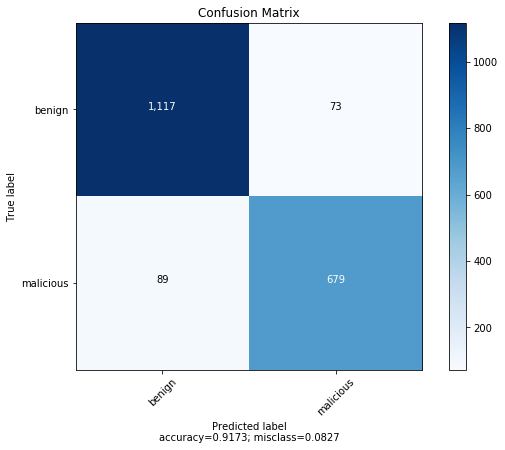

In [34]:
plot_confusion_matrix(cm, normalize = False, target_names = ['benign', 'malicious'], title = "Confusion Matrix")

## The ROC curve...

In [44]:
lw = 2
n_classes=2
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#colors = cycle(['darkorange', 'cornflowerblue'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#             label='ROC curve of class {0} (area = {1:0.2f})'
#             ''.format(i, roc_auc[i]))
#
#plt.plot([0, 1], [0, 1], 'k--', lw=lw)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
#plt.legend(loc="lower right")
#plt.show()

ValueError: Can only tuple-index with a MultiIndex

Let's see the feature importances

In [42]:
y_test

7256    malicious
614        benign
1437       benign
7626    malicious
2138       benign
5304    malicious
3184       benign
6185    malicious
4797    malicious
3309       benign
2909       benign
1239       benign
4143       benign
4194       benign
7274    malicious
2836       benign
1677       benign
5198    malicious
4807    malicious
5846    malicious
950        benign
4136       benign
2505       benign
7217    malicious
925        benign
472        benign
1487       benign
5065    malicious
391        benign
7748    malicious
          ...    
4856    malicious
5393    malicious
6429    malicious
4491       benign
1644       benign
1359       benign
1888       benign
1672       benign
5695    malicious
3645       benign
3075       benign
1518       benign
759        benign
6777    malicious
7008    malicious
3436       benign
4320       benign
6046    malicious
1406       benign
7744    malicious
1642       benign
2809       benign
6019    malicious
3355       benign
4158      

In [43]:
feature_importances = pd.DataFrame(rdF.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                    importance
 source_app_bytes     0.221418
remote_app_bytes      0.147509
tcp_packets           0.142017
remote_app_packets    0.134524
vulume_bytes          0.127661
source_app_packets    0.086725
dns_query_times       0.050267
dist_port_tcp         0.045439
external_ips          0.043016
udp_packets           0.001425


Let's see the correaltion

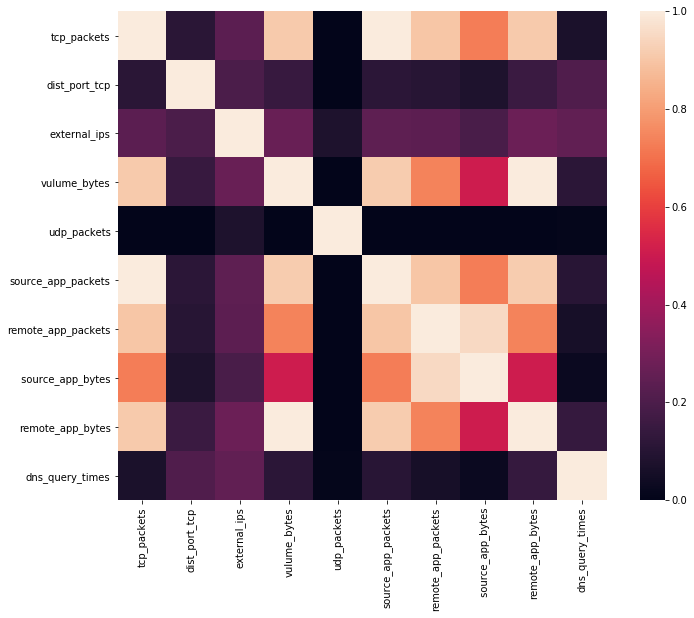

In [44]:
#correlation matrix
corrmat = scaledData.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

Let's save the model

In [46]:
joblib.dump(rdF, 'rfDefense.sav')

['rfDefense.sav']